# Introduction

This notebook contains several functions and classes that allow us to quickly conduct Exploratory Data Analysis, such as:
- NaN count
- Basic statistics of the dataset
- Bar chart plots
- Pair Plots
- Scatter Plots
- Correlation heatmaps


# Data ingestion

In [1]:
import pandas as pd
from eda_suite.containers import EdaContainer
from typing import List, Optional, Any, Dict

# 1. Load our data
df = pd.read_csv(r"YOUR_CSV_FILE.csv", delimiter = ",", encoding='latin1', skiprows=23)
# df = pd.read_excel(r"YOUR_EXCEL_FILE.xlsm")

display(df.head(5))

,Date/time,Vbatt,Temp.,Press.,Channel 1,Unnamed: 5,Channel 2,Unnamed: 7,Channel 3,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,NaN,NaN,NaN,NaN,(),(°C),(),(°C),(),(°C),...,(°C),NaN,(Digits),(Digits),(Digits),(Digits),(Digits),(Digits),(Digits),(Digits)
1,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
2,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,22.5,NaN,3752.3,2612.2,3414.4,Not av.,2979.3,3119.7,2825.1,3104.3
3,7/07/2025 13:19,4.9,34.3,1016.5,3746,28.4,2604.9,28.4,3417.4,30.1,...,22.4,NaN,3753.5,2612.4,3417.4,Not av.,2979.4,3119.8,2825.2,3104.5
4,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7


In [2]:
import pandas as pd
import re

def fix_unnamed_headers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans up DataFrame headers. It renames 'Unnamed' columns to an
    appropriate 'Temperature X' label if they follow a 'Channel X' column,
    and removes columns that are completely empty.
    """
    fixed_headers = []
    current_channel = None

    for i, col in enumerate(df.columns):
        header_clean = str(col).strip()
        col_data = df.iloc[:, i]

        match = re.match(r"Channel\s+(\d+)", header_clean)
        if match:
            current_channel = match.group(1)
            fixed_headers.append(header_clean)
        elif (not header_clean or header_clean.startswith("Unnamed")) and col_data.dropna().empty:
            fixed_headers.append(None) # Mark empty columns for removal
        elif (not header_clean or header_clean.startswith("Unnamed")) and current_channel:
            fixed_headers.append(f"Temperature {current_channel}")
        else:
            fixed_headers.append(header_clean)

    df.columns = fixed_headers
    df = df.loc[:, df.columns.notna()] # Drop marked columns
    return df

def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans a pre-loaded DataFrame by dropping the units row, fixing column
    names, and converting data types.
    """
    print("--- Starting DataFrame cleaning process ---")
    print("\n[1] INITIAL DATAFRAME RECEIVED:")
    display(df.head())
    print("-" * 60)

    try:
        # Drop the units row (which is the first data row at index 0)
        df = df.iloc[1:].reset_index(drop=True)
        print("\n[2] After dropping units row:")
        display(df.head())

        # Clean up 'Unnamed' headers and empty columns
        df = fix_unnamed_headers(df)
        print("\n[3] After fixing unnamed headers:")
        display(df.head())

        # Coerce all columns except 'Date/time' to numeric types
        for col in df.columns:
            if col != "Date/time":
                df[col] = pd.to_numeric(df[col], errors="coerce")
        print("\n[4] After coercing data to numeric:")
        display(df.head())

        # Rename the 'Date/time' column to 'datetime' for consistency
        df = df.rename(columns={"Date/time": "datetime"})
        print("\n[5] After renaming 'Date/time' column to 'datetime':")
        display(df.head())
        
        # Convert the 'datetime' column to actual datetime objects
        df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
        print("\n[6] FINAL DATAFRAME after converting 'datetime' column:")
        display(df.head())
        
        print(f"\n✅ Finished cleaning. Final shape: {df.shape}")
        return df

    except Exception as e:
        print(f"❌ Failed to clean the DataFrame: {e}")
        raise

In [3]:
df = clean_dataframe(df)
display(df.head(5))

--- Starting DataFrame cleaning process ---

[1] INITIAL DATAFRAME RECEIVED:


,Date/time,Vbatt,Temp.,Press.,Channel 1,Unnamed: 5,Channel 2,Unnamed: 7,Channel 3,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,NaN,NaN,NaN,NaN,(),(°C),(),(°C),(),(°C),...,(°C),NaN,(Digits),(Digits),(Digits),(Digits),(Digits),(Digits),(Digits),(Digits)
1,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
2,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,22.5,NaN,3752.3,2612.2,3414.4,Not av.,2979.3,3119.7,2825.1,3104.3
3,7/07/2025 13:19,4.9,34.3,1016.5,3746,28.4,2604.9,28.4,3417.4,30.1,...,22.4,NaN,3753.5,2612.4,3417.4,Not av.,2979.4,3119.8,2825.2,3104.5
4,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7


------------------------------------------------------------

[2] After dropping units row:


,Date/time,Vbatt,Temp.,Press.,Channel 1,Unnamed: 5,Channel 2,Unnamed: 7,Channel 3,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
1,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,22.5,NaN,3752.3,2612.2,3414.4,Not av.,2979.3,3119.7,2825.1,3104.3
2,7/07/2025 13:19,4.9,34.3,1016.5,3746,28.4,2604.9,28.4,3417.4,30.1,...,22.4,NaN,3753.5,2612.4,3417.4,Not av.,2979.4,3119.8,2825.2,3104.5
3,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
4,7/07/2025 13:49,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,22.3,NaN,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7



[3] After fixing unnamed headers:


,Date/time,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Channel 8,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,3104.7,22.3,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
1,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,3104.3,22.5,3752.3,2612.2,3414.4,Not av.,2979.3,3119.7,2825.1,3104.3
2,7/07/2025 13:19,4.9,34.3,1016.5,3746,28.4,2604.9,28.4,3417.4,30.1,...,3104.5,22.4,3753.5,2612.4,3417.4,Not av.,2979.4,3119.8,2825.2,3104.5
3,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30,...,3104.7,22.3,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7
4,7/07/2025 13:49,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30,...,3104.7,22.3,3755.3,2612.9,3418.8,Not av.,2979,3119.9,2825.3,3104.7



[4] After coercing data to numeric:


,Date/time,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Channel 8,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
1,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,3104.3,22.5,3752.3,2612.2,3414.4,NaN,2979.3,3119.7,2825.1,3104.3
2,7/07/2025 13:19,4.9,34.3,1016.5,3746.0,28.4,2604.9,28.4,3417.4,30.1,...,3104.5,22.4,3753.5,2612.4,3417.4,NaN,2979.4,3119.8,2825.2,3104.5
3,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
4,7/07/2025 13:49,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7



[5] After renaming 'Date/time' column to 'datetime':


,datetime,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Channel 8,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,7/07/2025 12:49,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
1,7/07/2025 13:04,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,3104.3,22.5,3752.3,2612.2,3414.4,NaN,2979.3,3119.7,2825.1,3104.3
2,7/07/2025 13:19,4.9,34.3,1016.5,3746.0,28.4,2604.9,28.4,3417.4,30.1,...,3104.5,22.4,3753.5,2612.4,3417.4,NaN,2979.4,3119.8,2825.2,3104.5
3,7/07/2025 13:34,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
4,7/07/2025 13:49,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7



[6] FINAL DATAFRAME after converting 'datetime' column:


,datetime,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Channel 8,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,2025-07-07 12:49:00,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
1,2025-07-07 13:04:00,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,3104.3,22.5,3752.3,2612.2,3414.4,NaN,2979.3,3119.7,2825.1,3104.3
2,2025-07-07 13:19:00,4.9,34.3,1016.5,3746.0,28.4,2604.9,28.4,3417.4,30.1,...,3104.5,22.4,3753.5,2612.4,3417.4,NaN,2979.4,3119.8,2825.2,3104.5
3,2025-07-07 13:34:00,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
4,2025-07-07 13:49:00,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7



✅ Finished cleaning. Final shape: (7089, 28)


,datetime,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Channel 8,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw
0,2025-07-07 12:49:00,5.0,34.5,1017.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
1,2025-07-07 13:04:00,4.9,34.3,1016.7,3744.8,28.5,2604.7,28.5,3414.4,30.2,...,3104.3,22.5,3752.3,2612.2,3414.4,NaN,2979.3,3119.7,2825.1,3104.3
2,2025-07-07 13:19:00,4.9,34.3,1016.5,3746.0,28.4,2604.9,28.4,3417.4,30.1,...,3104.5,22.4,3753.5,2612.4,3417.4,NaN,2979.4,3119.8,2825.2,3104.5
3,2025-07-07 13:34:00,4.9,34.2,1016.2,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7
4,2025-07-07 13:49:00,4.9,34.1,1016.0,3747.8,28.3,2605.4,28.3,3418.8,30.0,...,3104.7,22.3,3755.3,2612.9,3418.8,NaN,2979.0,3119.9,2825.3,3104.7


In [4]:
# 2. Create and configure the container
container = EdaContainer()
container.config.df.from_value(df)

# 3. Get the fully assembled analyser
# The container builds the profiler, visualizer, etc., and injects them.
analyzer = container.analyzer()

# 4. Use it! It's that simple.
analyzer.show_profile()

analyzer.show_descriptive_stats()

analyzer.show_missing_values()

analyzer.show_value_occurrences(value_to_find="N.U.")

analyzer.show_mixed_type_report()

# name_map = {'purch_amt': 'Purchase Amount'}
# analyzer.set_column_map(name_map)

# analyzer.plot_distribution('Purchase Amount')

--- DataFrame Heuristic Profile ---
Shape: 7089 rows, 28 columns

Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Temperature 1', 'Channel 2', 'Temperature 2', 'Channel 3', 'Temperature 3', 'Temperature 4', 'Channel 5', 'Temperature 5', 'Channel 6', 'Temperature 6', 'Channel 7', 'Temperature 7', 'Channel 8', 'Temperature 8', 'CH1 Raw', 'CH2 Raw', 'CH3 Raw', 'CH5 Raw', 'CH6 Raw', 'CH7 Raw', 'CH8 Raw']

Categorical Columns (likely discrete):
  ['datetime', 'Vbatt', 'Channel 4', 'CH4 Raw']

ID Columns (high cardinality):
  []
-----------------------------------

--- Descriptive Statistics (Numerical) ---
             Vbatt        Temp.       Press.    Channel 1  Temperature 1    Channel 2  Temperature 2    Channel 3  Temperature 3  Channel 4  Temperature 4   Channel 5  Temperature 5    Channel 6  Temperature 6    Channel 7  Temperature 7    Channel 8  Temperature 8      CH1 Raw      CH2 Raw      CH3 Raw     CH4 Raw      CH5 Raw      CH6 Raw      CH7 Raw      CH8

In [5]:
# Data cleaning
import numpy as np

# Define the columns we know should be numeric
columns_to_clean = [
    'Channel 4', 'Temperature 4', 
    'Channel 7', 'Temperature 7'
]

# 1. CLEAN: Replace the "N.U." string with a real null value (NaN)
analyzer.clean_replace_values(
    columns=columns_to_clean, 
    value_to_replace="N.U.", 
    new_value=np.nan
)

# 2. CONVERT: Force the columns to a numeric type. 
# 'coerce' will handle any other unexpected strings.
# This is required so we can properly plot distribitions. Noting that the plot_distributions method does NOT use heuristics, it purely looks at the value type (numeric vs Object)
analyzer.clean_coerce_numeric(columns=columns_to_clean)


--- Replacing Values ---
Replacing 'N.U.' with 'nan' in columns: ['Channel 4', 'Temperature 4', 'Channel 7', 'Temperature 7']...
Replacement complete.

--- Coercing to Numeric ---
Attempting to convert columns to numeric: ['Channel 4', 'Temperature 4', 'Channel 7', 'Temperature 7']...
Conversion complete.



In [6]:
# 3. RE-EXPLORE: Now run the profiler again

analyzer.show_profile()

analyzer.show_descriptive_stats()

analyzer.show_missing_values()

analyzer.show_value_occurrences(value_to_find="N.U.")

analyzer.show_mixed_type_report()

print("="*60)

display(df['datetime'].min())
display(df['datetime'].max())

--- DataFrame Heuristic Profile ---
Shape: 7089 rows, 28 columns

Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Temperature 1', 'Channel 2', 'Temperature 2', 'Channel 3', 'Temperature 3', 'Temperature 4', 'Channel 5', 'Temperature 5', 'Channel 6', 'Temperature 6', 'Channel 7', 'Temperature 7', 'Channel 8', 'Temperature 8', 'CH1 Raw', 'CH2 Raw', 'CH3 Raw', 'CH5 Raw', 'CH6 Raw', 'CH7 Raw', 'CH8 Raw']

Categorical Columns (likely discrete):
  ['datetime', 'Vbatt', 'Channel 4', 'CH4 Raw']

ID Columns (high cardinality):
  []
-----------------------------------

--- Descriptive Statistics (Numerical) ---
             Vbatt        Temp.       Press.    Channel 1  Temperature 1    Channel 2  Temperature 2    Channel 3  Temperature 3  Channel 4  Temperature 4   Channel 5  Temperature 5    Channel 6  Temperature 6    Channel 7  Temperature 7    Channel 8  Temperature 8      CH1 Raw      CH2 Raw      CH3 Raw     CH4 Raw      CH5 Raw      CH6 Raw      CH7 Raw      CH8

Timestamp('2025-07-07 12:49:00')

Timestamp('2025-09-19 09:04:00')

The initial EDA has shown:

- There were missing values (but marked as N.U.). These have been converted to numpy NaN values. 
- Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Channel 1 Temperature', 'Channel 2', 'Channel 2 Temperature', 'Channel 3', 'Channel 3 Temperature', 'Channel 4', 'Channel 4 Temperature', 'Channel 5', 'Channel  Temperature', 'Channel 6', 'Channel 5 Temperature', 'Channel 7', 'Channel 7 Temperature', 'Channel 8', 'Channel 8 Temperature']
- Categorical Columns (likely discrete):
  ['Date/time', 'Vbatt']
  Note: Vbatt is numerical, so if we are going to transform it, or use, we must re-specify the numerical_cols list. Same is true for the categorical_cols list. 

--- Plotting Distribution(s) ---


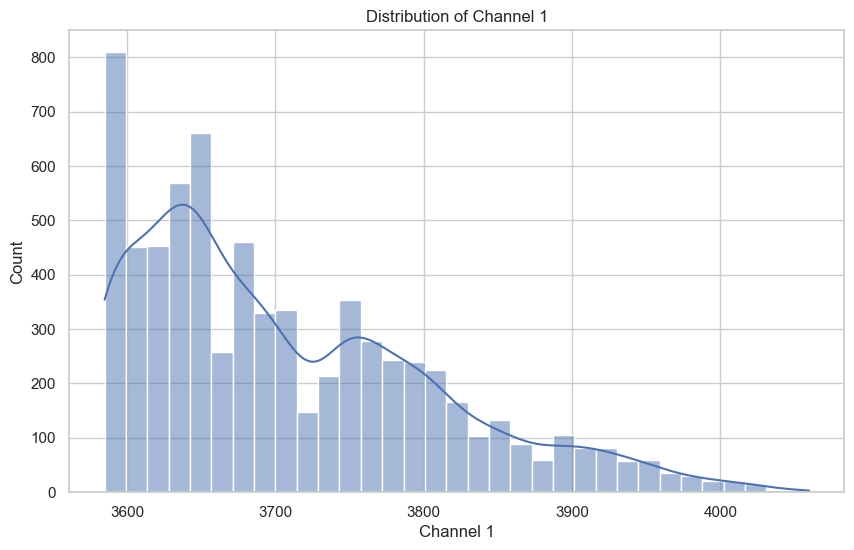

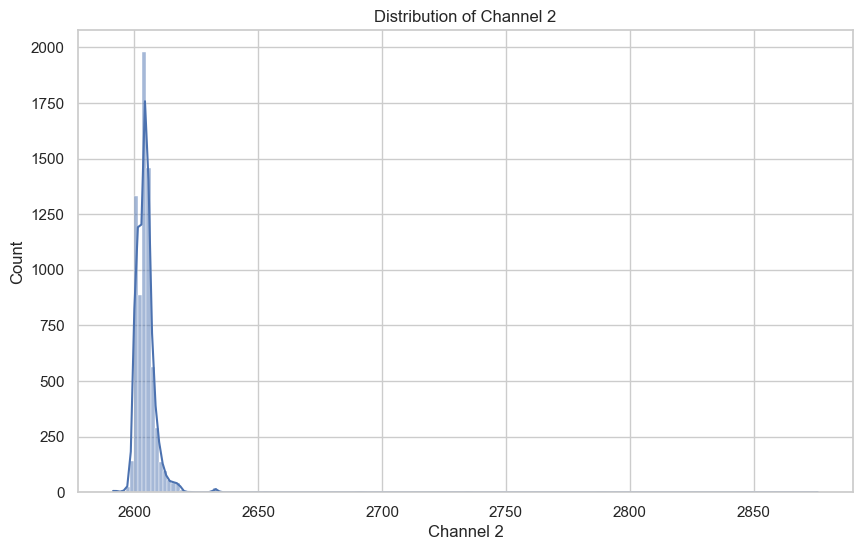

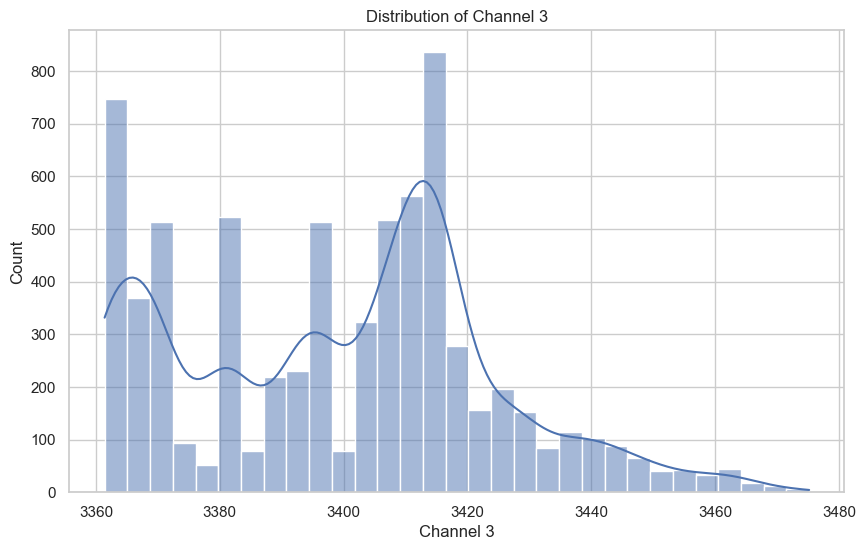

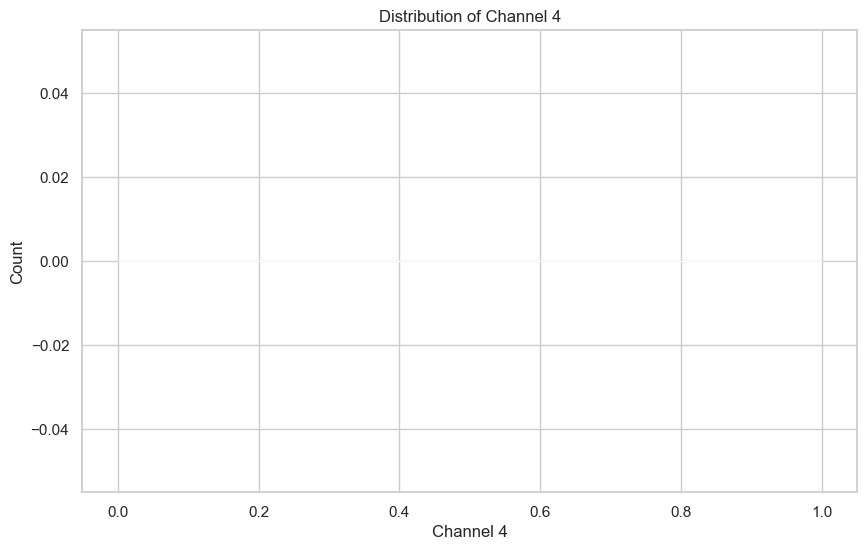

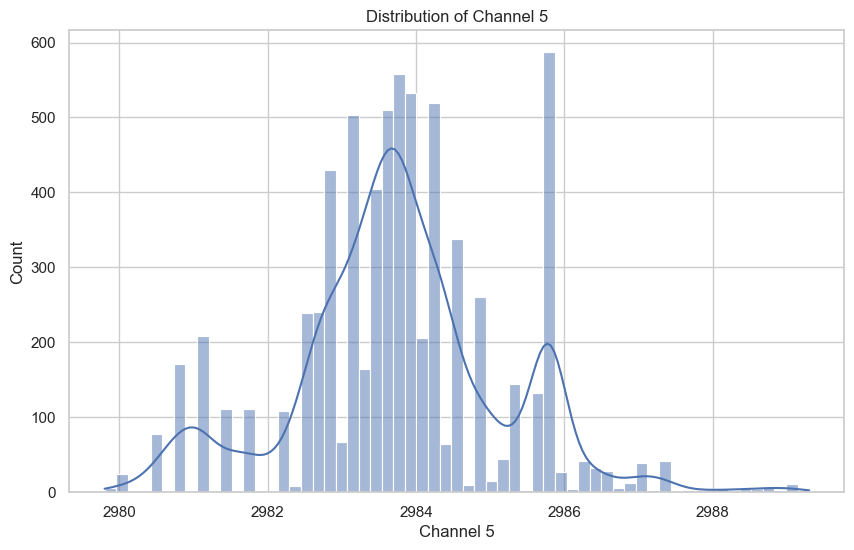

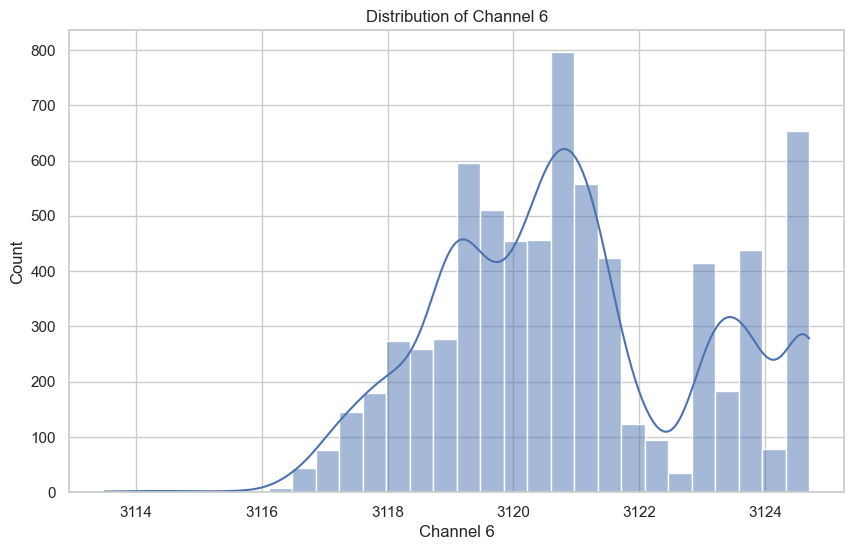

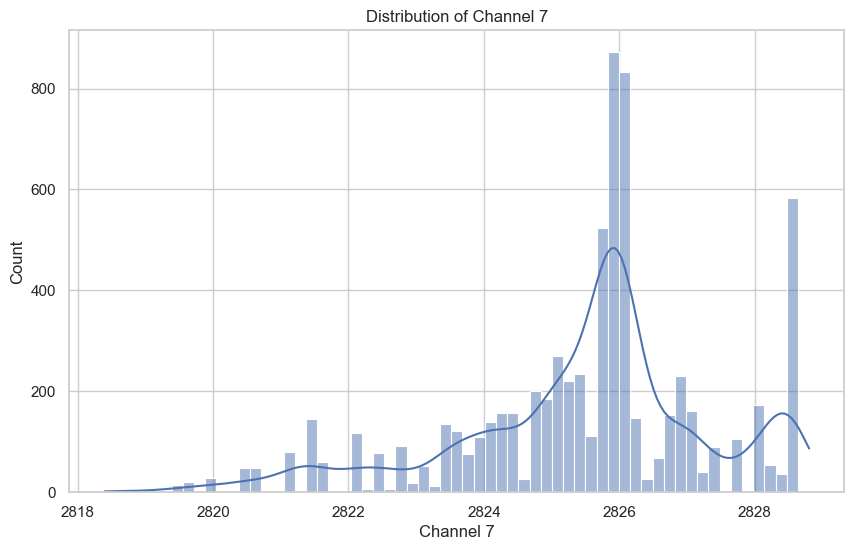

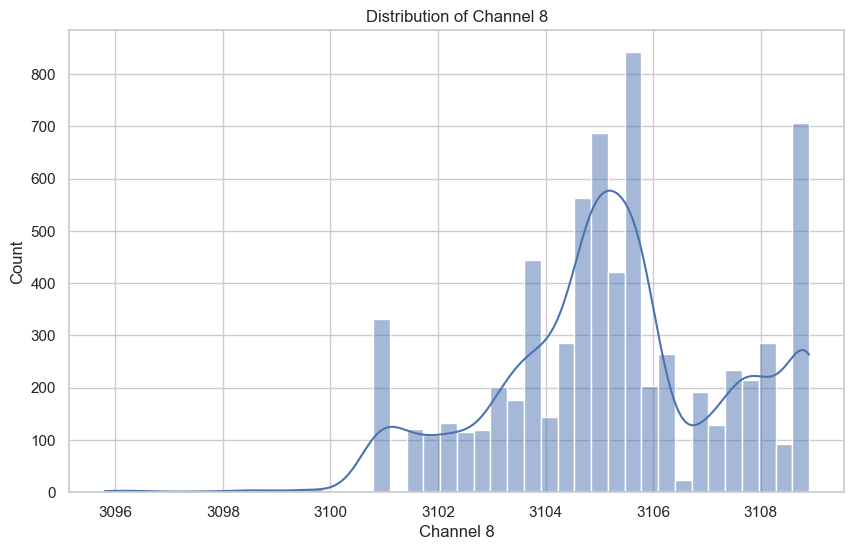

In [7]:

analyzer.plot_distribution([f"Channel {i}" for i in range(1, 9)])

--- Plotting Box Plot(s) ---


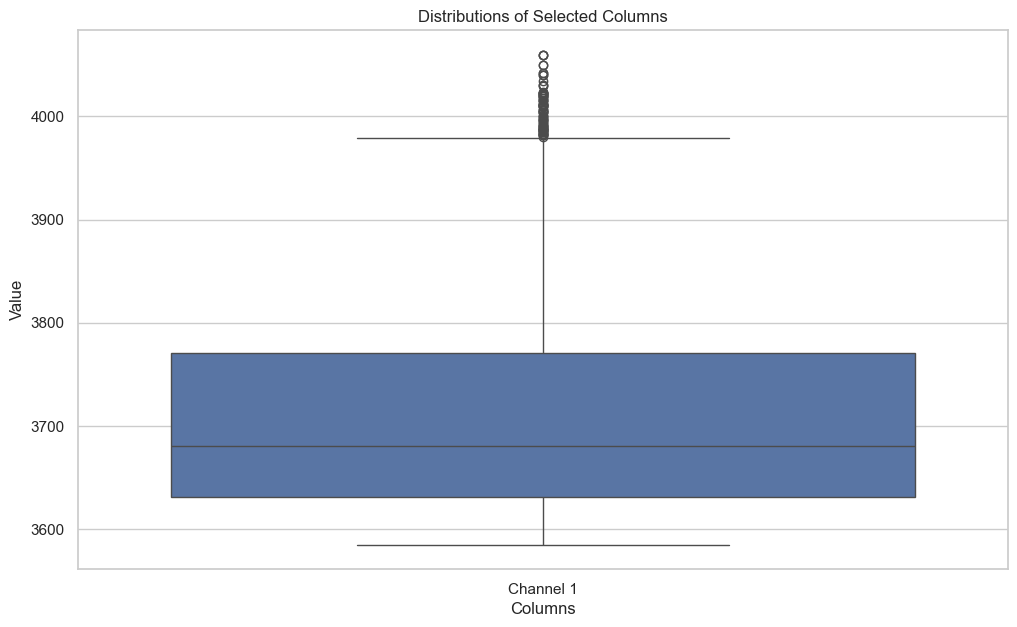

--- Plotting Box Plot(s) ---


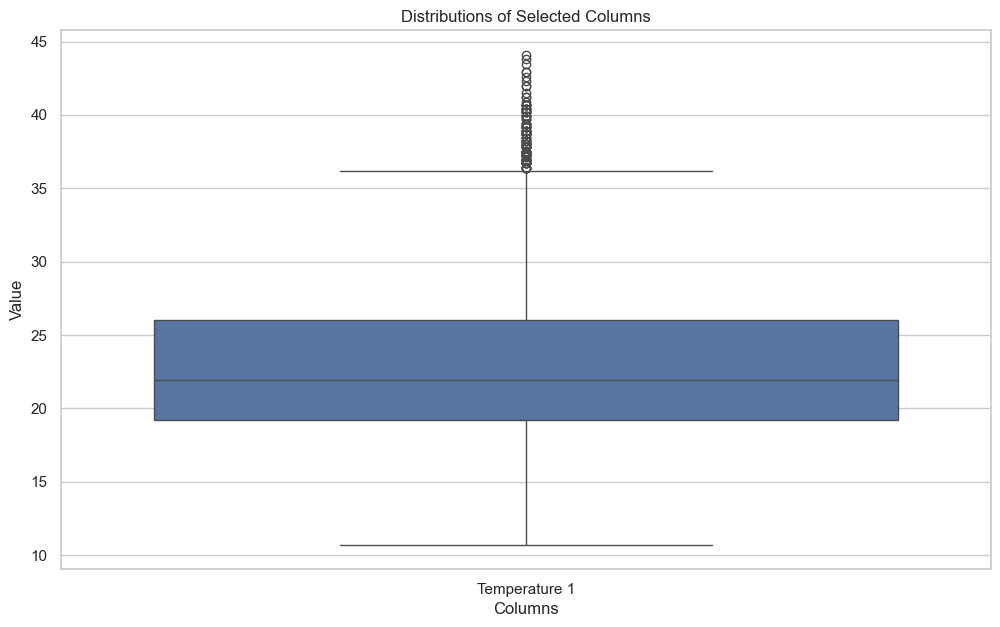

--- Plotting Box Plot(s) ---


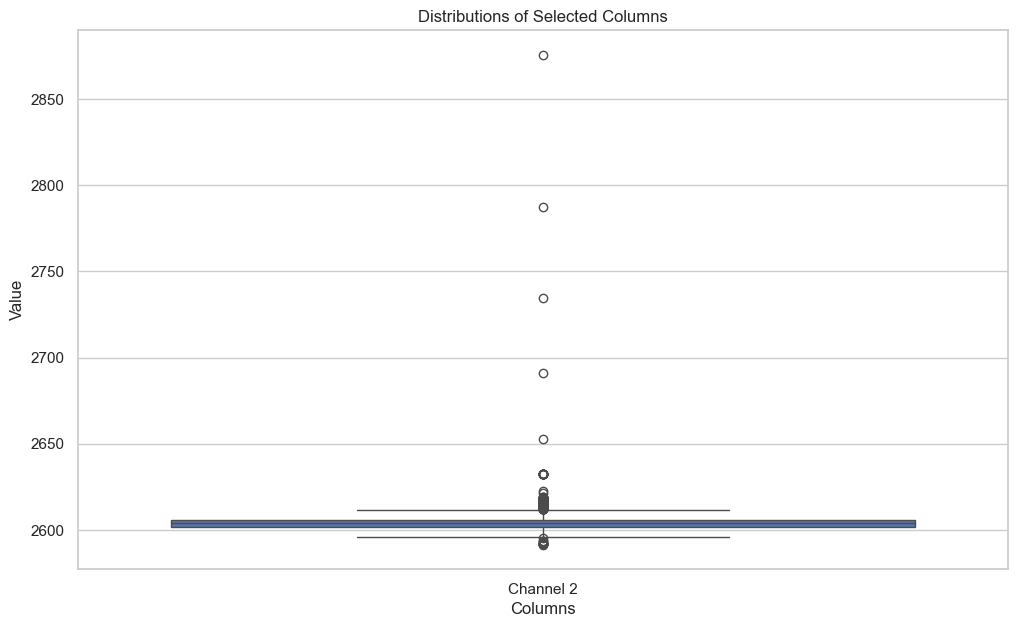

--- Plotting Box Plot(s) ---


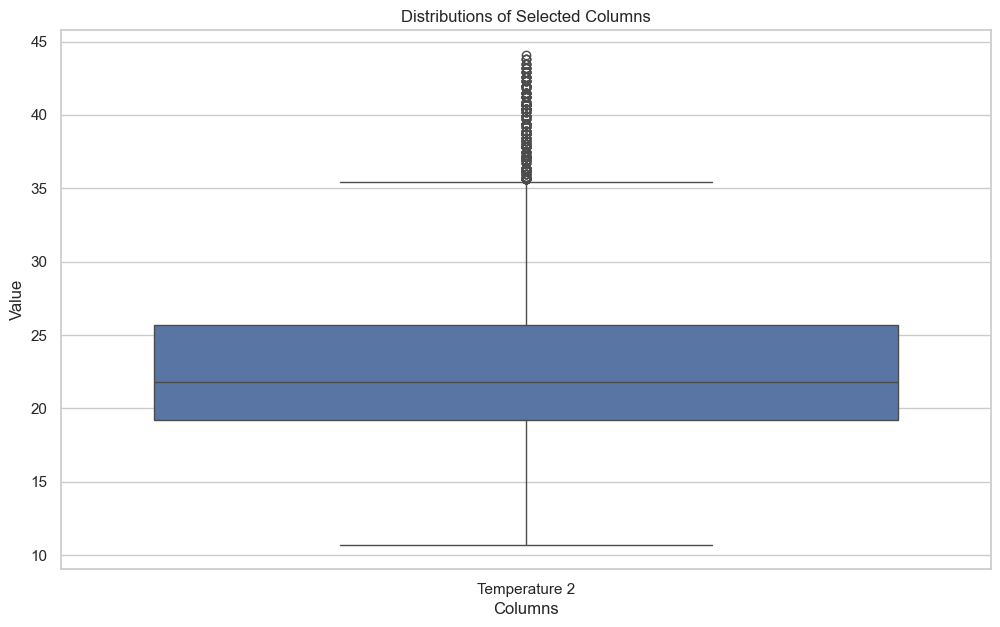

--- Plotting Box Plot(s) ---


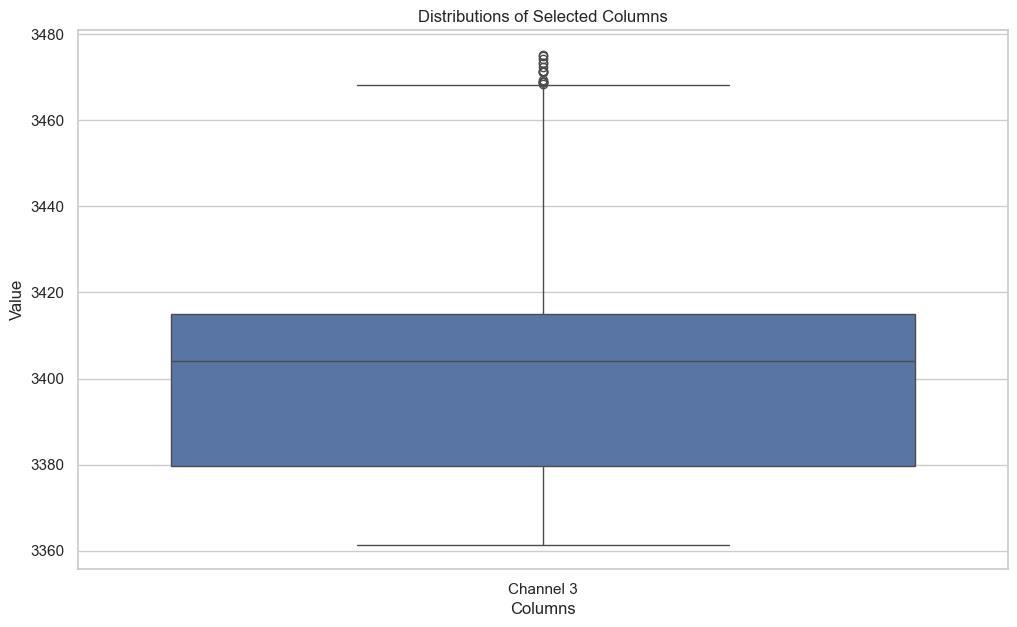

--- Plotting Box Plot(s) ---


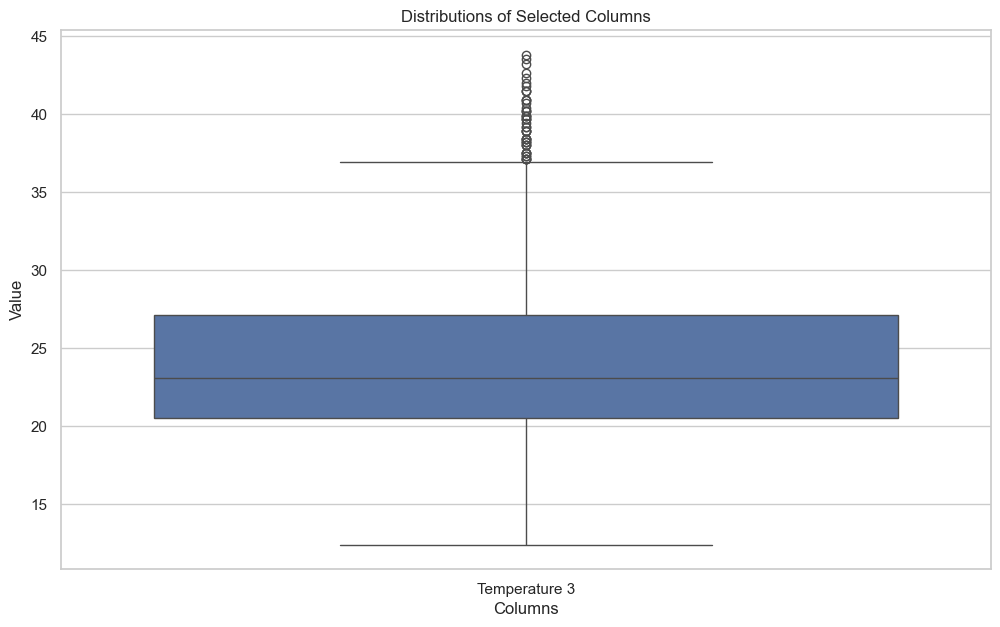

--- Plotting Box Plot(s) ---


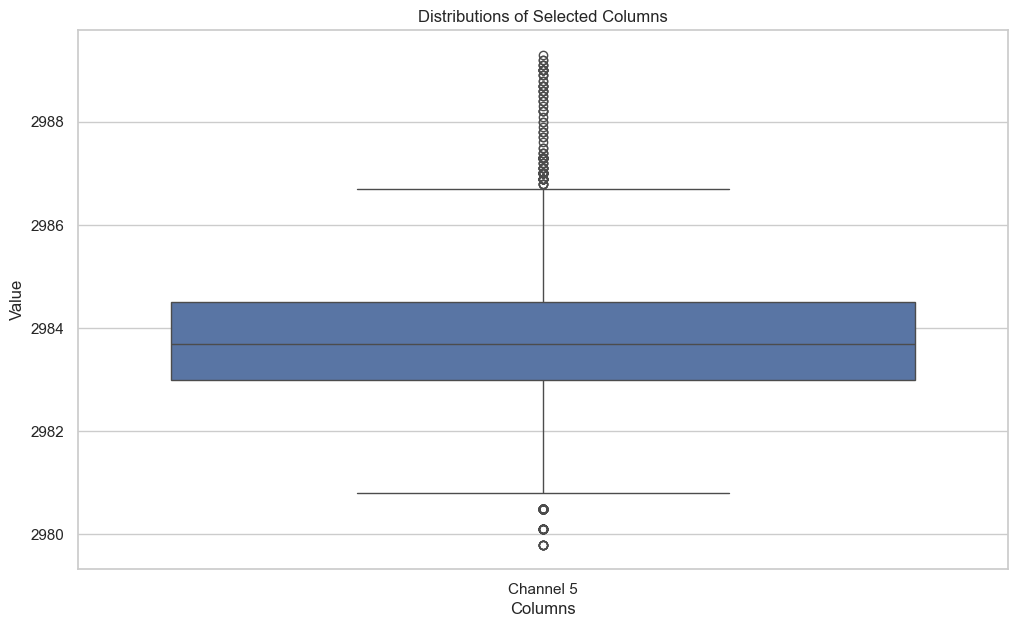

--- Plotting Box Plot(s) ---


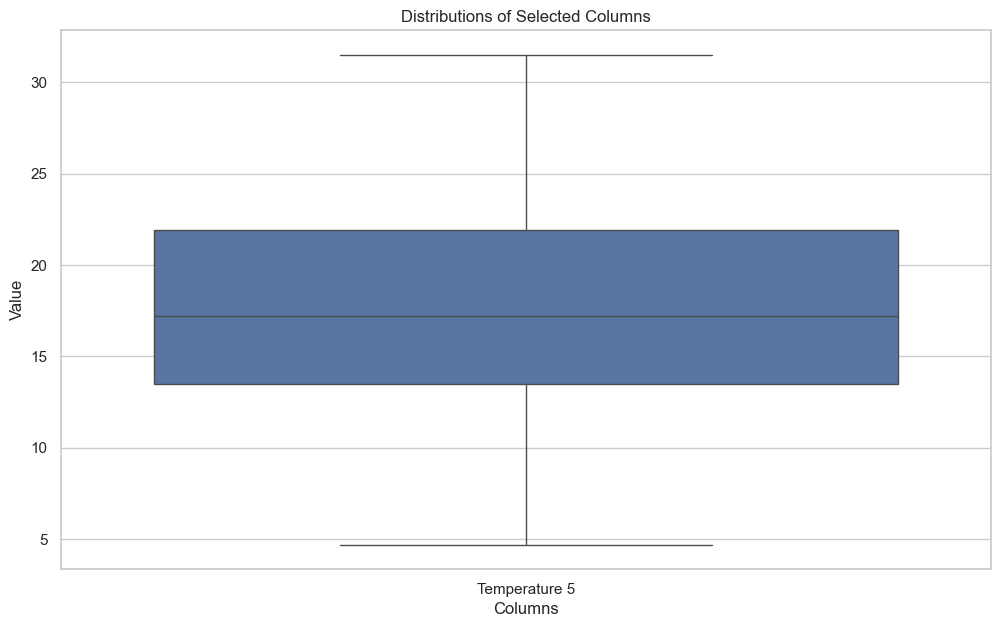

--- Plotting Box Plot(s) ---


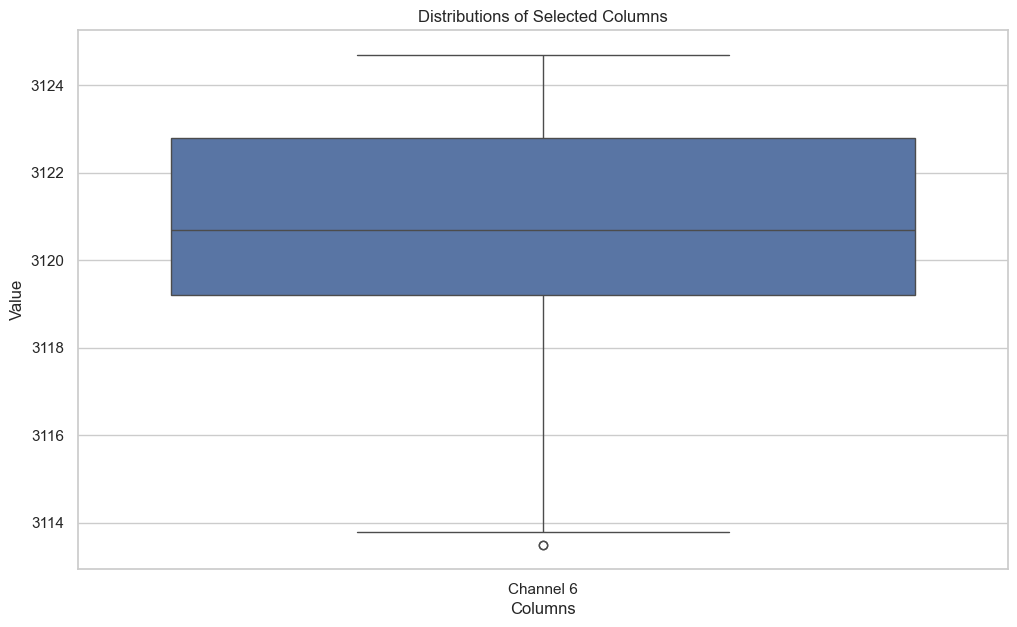

--- Plotting Box Plot(s) ---


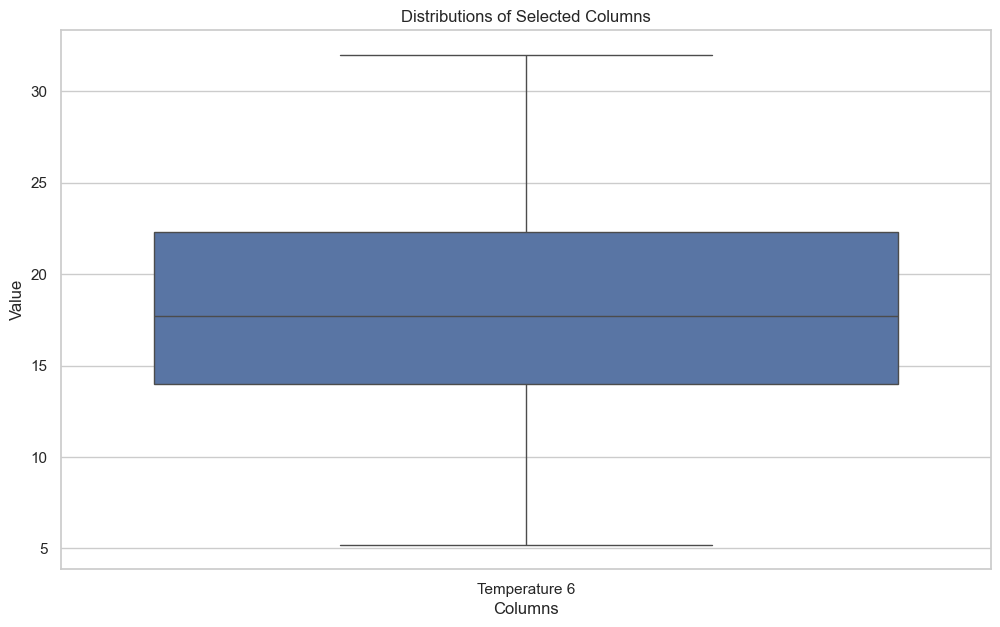

--- Plotting Box Plot(s) ---


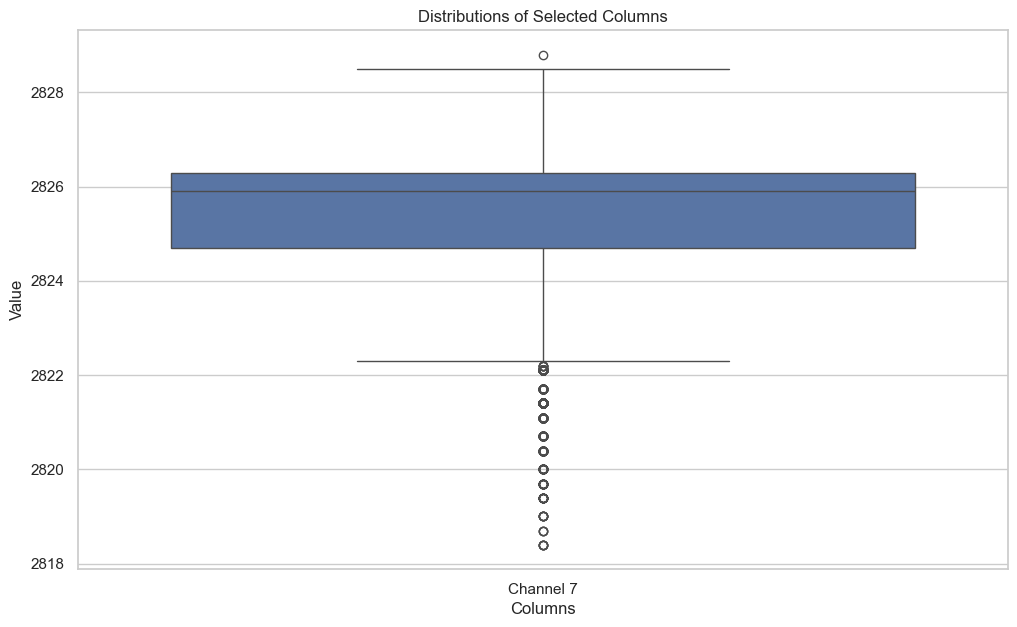

--- Plotting Box Plot(s) ---


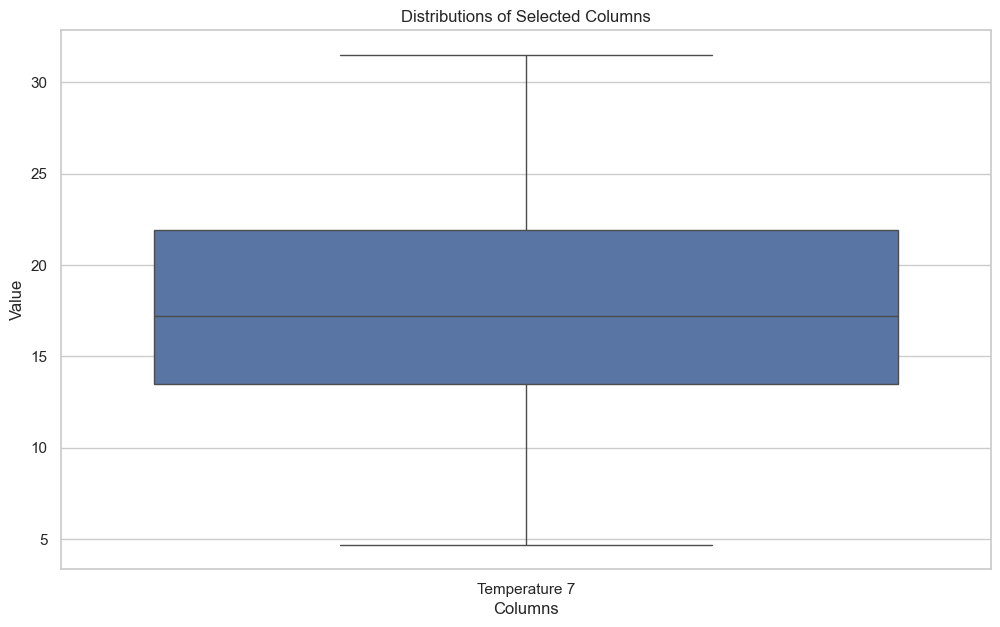

--- Plotting Box Plot(s) ---


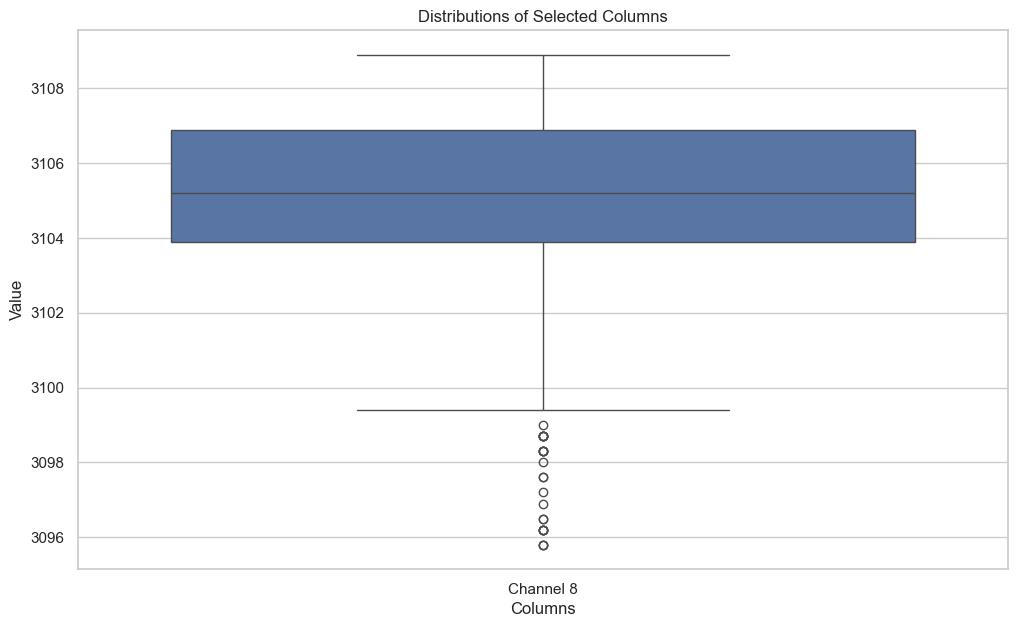

--- Plotting Box Plot(s) ---


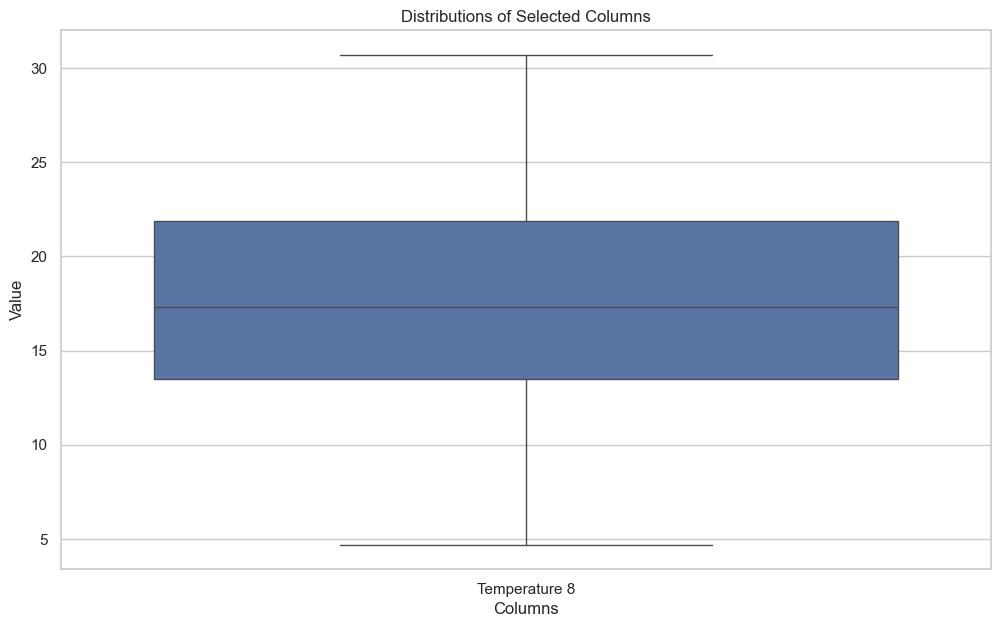

In [8]:
# as discussed and concluded, we must create our own numerical_cols list. Fortunately the analyzer.show_profile() has helped us generate a good start

numerical_cols: List[str] = ['Channel 1', 'Temperature 1', 'Channel 2', 'Temperature 2', 'Channel 3', 'Temperature 3', 'Channel 5', 'Temperature 5', 'Channel 6', 'Temperature 6', 'Channel 7', 'Temperature 7', 'Channel 8', 'Temperature 8']

# now we can create boxplots for all of them. 
# analyzer.plot_boxplots(numerical_cols)


# Or, if we want individual plots:
for col in numerical_cols:
    analyzer.plot_boxplots(col)


[('Channel 1', 'Temperature 1'), ('Channel 2', 'Temperature 2'), ('Channel 3', 'Temperature 3'), ('Channel 5', 'Temperature 5'), ('Channel 6', 'Temperature 6'), ('Channel 7', 'Temperature 7'), ('Channel 8', 'Temperature 8')]
--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 1 vs. Temperature 1 ---


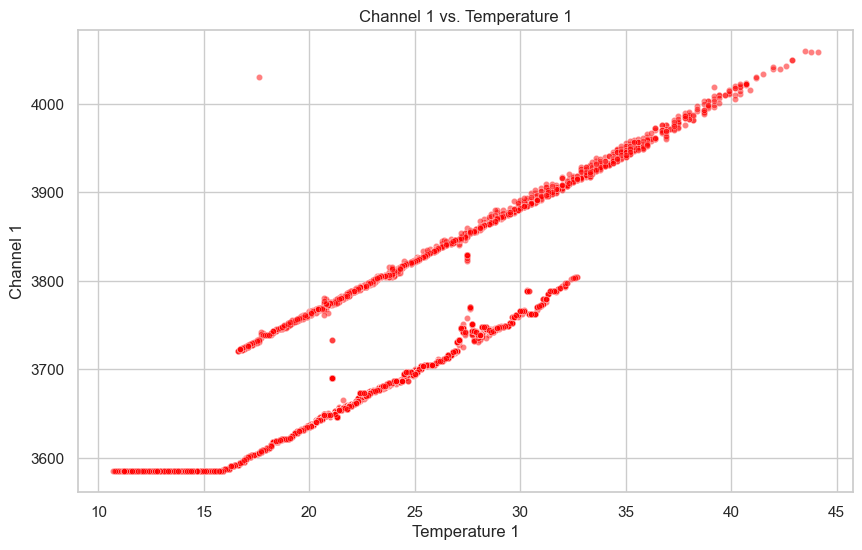

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 2 vs. Temperature 2 ---


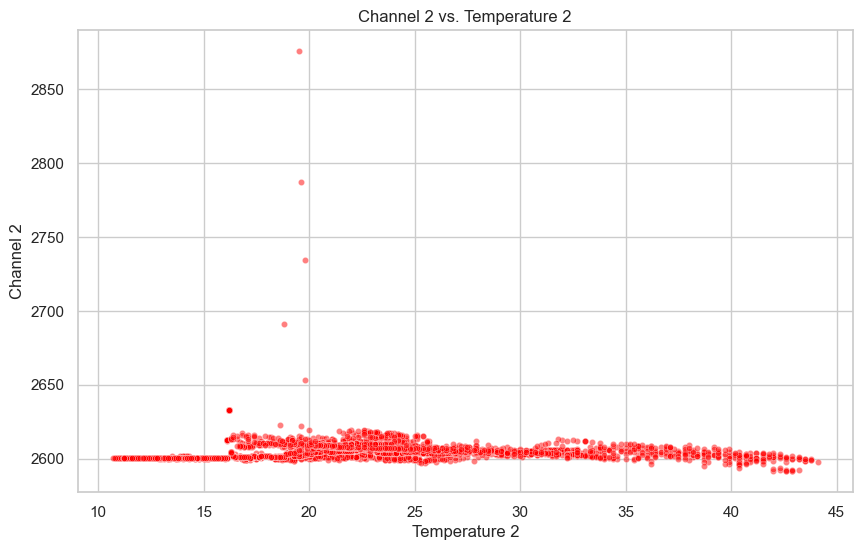

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 3 vs. Temperature 3 ---


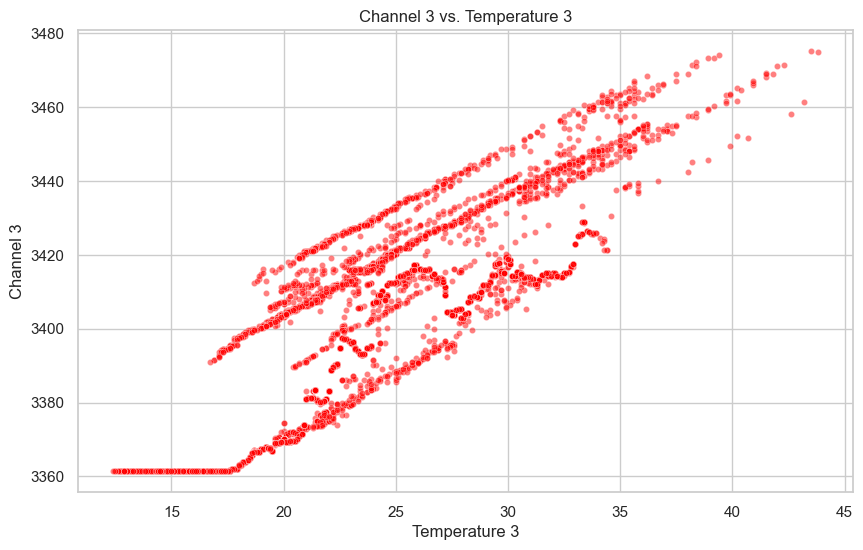

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 5 vs. Temperature 5 ---


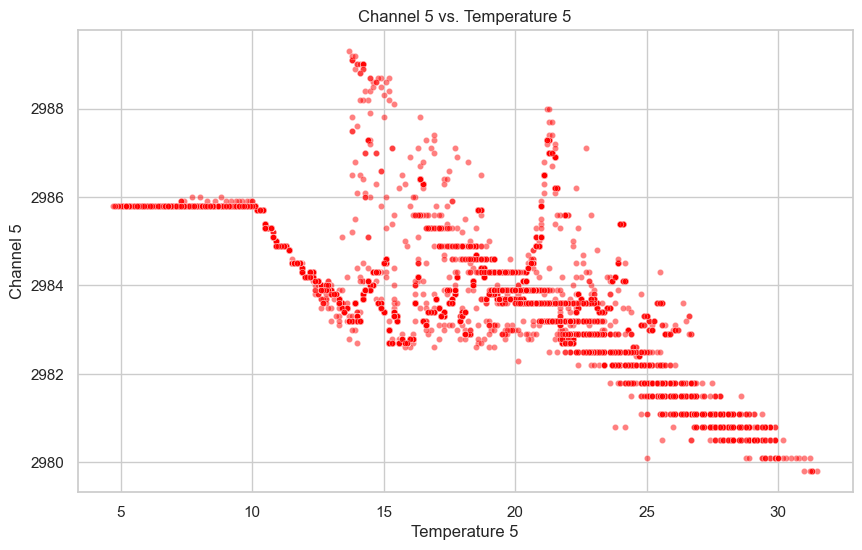

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 6 vs. Temperature 6 ---


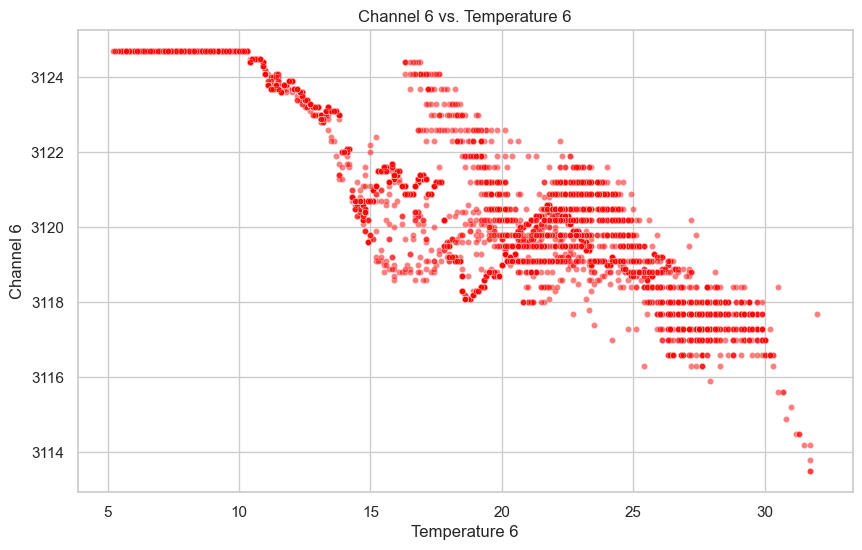

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 7 vs. Temperature 7 ---


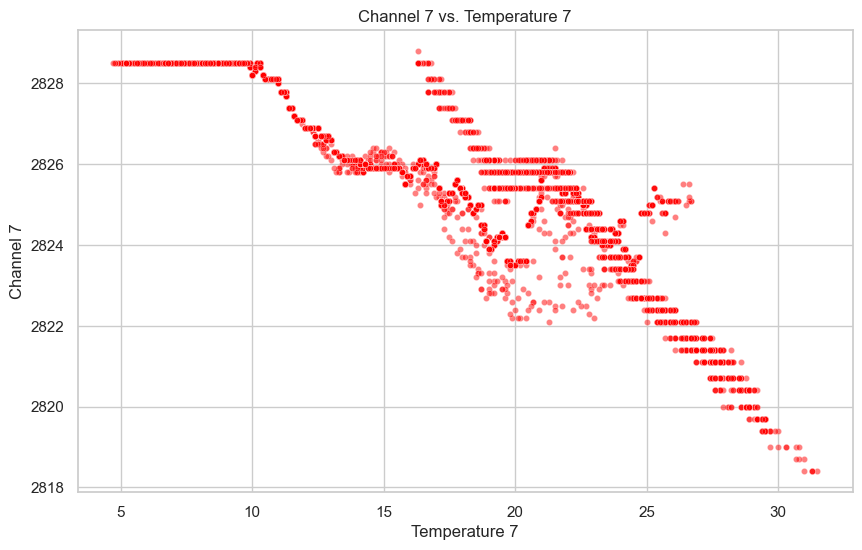

--- Plotting Scatter Plot ---
--- Plotting Scatter Plot: Channel 8 vs. Temperature 8 ---


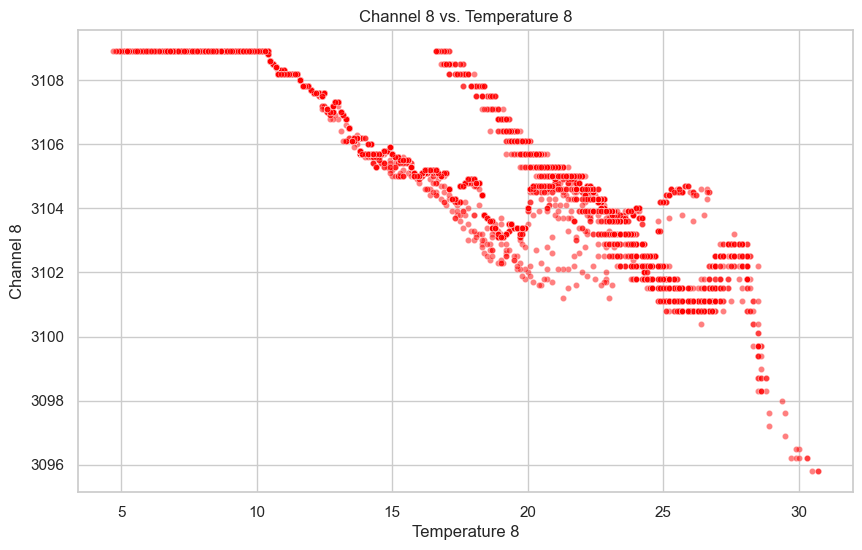

In [11]:
pairs = []

# Slice the list into even items (0, 2, 4...) and odd items (1, 3, 5...)
even_items = numerical_cols[0::2] # meaning start:stop:step, leaving the stop empty -> go all the way to the end of the list, in steps of two. 
odd_items  = numerical_cols[1::2]

# Zip them together to create the pairs
pairs = list(zip(even_items, odd_items)) # zip: zips together, like a jacket zipper, two items in a tuple. These tuples are added to a list. 

print(pairs)

# Unpack each tuple directly into 'channel' and 'temp' variables
for channel, temp in pairs:
    # print(f"The Channel is: {channel}")
    # print(f"The Temperature is: {temp}")
    # print("---")
    analyzer.plot_scatter(temp, channel)





In [10]:
# Let's workout any potential outliers in our dataset:

analyzer.show_outliers(numerical_cols, method='iqr')

--- Identifying outliers using the 'iqr' method ---
  - Column 'Channel 1': IQR bounds are [3421.55, 3979.55]
  - Column 'Temperature 1': IQR bounds are [9.00, 36.20]
  - Column 'Channel 2': IQR bounds are [2595.80, 2611.80]
  - Column 'Temperature 2': IQR bounds are [9.45, 35.45]
  - Column 'Channel 3': IQR bounds are [3326.60, 3468.20]
  - Column 'Temperature 3': IQR bounds are [10.60, 37.00]
  - Column 'Channel 5': IQR bounds are [2980.75, 2986.75]
  - Column 'Temperature 5': IQR bounds are [0.90, 34.50]
  - Column 'Channel 6': IQR bounds are [3113.80, 3128.20]
  - Column 'Temperature 6': IQR bounds are [1.55, 34.75]
  - Column 'Channel 7': IQR bounds are [2822.30, 2828.70]
  - Column 'Temperature 7': IQR bounds are [0.90, 34.50]
  - Column 'Channel 8': IQR bounds are [3099.40, 3111.40]
  - Column 'Temperature 8': IQR bounds are [0.90, 34.50]
Found a total of 1639 outlier rows.
--- Occurrences of outliers: ---


,datetime,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,Temperature 8,CH1 Raw,CH2 Raw,CH3 Raw,CH4 Raw,CH5 Raw,CH6 Raw,CH7 Raw,CH8 Raw,outlier_reason
5367,2025-09-01 10:34:00,5.6,36.8,1010.4,3988.8,38.0,2604.0,38.9,3445.1,33.8,...,26.3,3988.8,2604.0,3445.1,NaN,2980.8,3117.3,2821.1,3101.1,'Channel 1' outside IQR bounds
5461,2025-09-02 10:19:00,5.6,38.5,1010.8,4006.0,39.2,2600.5,42.3,3452.5,36.7,...,26.3,4006.0,2600.5,3452.5,NaN,2980.5,3117.3,2820.7,3101.5,'Channel 1' outside IQR bounds
5462,2025-09-02 10:34:00,5.6,38.4,1010.5,4010.0,39.4,2598.5,42.0,3451.8,36.0,...,26.5,4010.0,2598.5,3451.8,NaN,2980.5,3118.0,2821.1,3101.5,'Channel 1' outside IQR bounds
5463,2025-09-02 10:49:00,5.6,38.4,1010.3,3981.6,38.2,2598.2,41.5,3449.9,35.4,...,26.5,3981.6,2598.2,3449.9,NaN,2980.8,3118.4,2821.1,3101.1,'Channel 1' outside IQR bounds
5550,2025-09-03 08:34:00,5.6,27.6,1010.3,3986.8,37.5,2604.7,36.7,3459.6,38.9,...,23.4,3986.8,2604.7,3459.6,NaN,2981.5,3119.8,2822.7,3102.2,'Channel 1' outside IQR bounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,2025-09-10 15:34:00,5.4,31.9,1007.3,3891.5,30.8,2605.0,30.8,3438.4,30.7,...,28.6,3891.5,2605.0,3438.4,NaN,2980.1,3116.6,2819.4,3098.7,'Channel 8' outside IQR bounds
6251,2025-09-10 15:49:00,5.4,31.6,1007.4,3893.1,31.0,2605.6,31.0,3439.2,30.8,...,28.6,3893.1,2605.6,3439.2,NaN,2980.1,3116.6,2819.4,3098.7,'Channel 8' outside IQR bounds
6252,2025-09-10 16:04:00,5.4,31.2,1007.2,3892.7,31.0,2604.4,30.8,3438.8,30.7,...,28.8,3892.7,2604.4,3438.8,NaN,2980.1,3116.6,2819.4,3098.7,'Channel 8' outside IQR bounds
6253,2025-09-10 16:19:00,5.4,30.9,1007.3,3891.9,30.8,2604.0,30.8,3438.4,30.7,...,28.8,3891.9,2604.0,3438.4,NaN,2980.1,3116.6,2819.0,3098.7,'Channel 8' outside IQR bounds


(1639, 29)
